In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city and ride data files and store them in pandas DataFrames.
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [12]:
# 120 rows, 3 columns ['city', 'driver_count', 'type'], [object, int, object]
# no nulls, 'city' is unique
# types are ['Urban', 'Suburban', 'Rural'] with 66, 36, 18 cities each
# driver count ranges from 1 to 73, mean 25, median 20.5

city_data_df.describe()

,driver_count
count,120.000000
mean,24.775000
std,20.277678
min,1.000000
25%,7.000000
50%,20.500000
75%,38.250000
max,73.000000


In [18]:
# 2375 rows, no nulls
# 4 columns ['city', 'date', 'fare', 'ride_id'], [obj, obj, float, int]
# ride-id unique, 120 cities, fare ranges from 4.05 to 58.55, mean,median=26.5

ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [19]:
import datetime

In [21]:
ride_data_df['realdate'] = ride_data_df['date'].map(lambda x: datetime.datetime.fromisoformat(x))

In [27]:
# min '2019-01-01 00:08:16' , max '2019-05-08 13:10:18'
ride_data_df['realdate'].max()

Timestamp('2019-05-08 13:10:18')

In [28]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [29]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,realdate,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,2019-01-14 10:14:22,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,2019-03-04 18:24:09,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,2019-02-24 04:29:00,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,2019-02-10 23:22:03,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,2019-03-06 04:28:35,46,Urban


In [31]:
pyber_data_df.count()

city            2375
date            2375
fare            2375
ride_id         2375
realdate        2375
driver_count    2375
type            2375
dtype: int64

In [47]:
city_agg_df = pyber_data_df.groupby('city').agg(ride_count=('ride_id', (lambda x: len(x))),
                                                avg_fare=('fare', np.mean),
                                                driver_count=('driver_count', (lambda x: x.mode())),
                                                city_type=('type', (lambda x: x.mode())))

In [48]:
city_agg_df

,number_of_rides,average_fare,driver_count,city_type
city,,,,
Amandaburgh,18,24.641667,12,Urban
Barajasview,22,25.332273,26,Urban
Barronchester,16,36.422500,11,Suburban
Bethanyland,18,32.956111,22,Suburban
Bradshawfurt,10,40.064000,7,Rural
...,...,...,...,...
West Robert,31,25.123871,39,Urban
West Samuelburgh,25,21.767600,73,Urban
Williamsonville,14,31.875000,2,Suburban


In [49]:
city_agg_df['sum_of_fares'] = city_agg_df['ride_count']*city_agg_df['avg_fare']

In [60]:
# def colorr(x):
#     if x == 'Urban':
#         return 'orange'
#     elif x == 'Suburban':
#         return 'skyblue'
#     else:
#         return 'yellow'

# city_agg_df['type_color'] = city_agg_df['city_type'].map(lambda x : colorr(x))


In [61]:
city_agg_df

,number_of_rides,average_fare,driver_count,city_type,sum_of_fares,type_color
city,,,,,,
Amandaburgh,18,24.641667,12,Urban,443.55,orange
Barajasview,22,25.332273,26,Urban,557.31,orange
Barronchester,16,36.422500,11,Suburban,582.76,skyblue
Bethanyland,18,32.956111,22,Suburban,593.21,skyblue
Bradshawfurt,10,40.064000,7,Rural,400.64,yellow
...,...,...,...,...,...,...
West Robert,31,25.123871,39,Urban,778.84,orange
West Samuelburgh,25,21.767600,73,Urban,544.19,orange
Williamsonville,14,31.875000,2,Suburban,446.25,skyblue


In [51]:
stats_by_type_df = city_agg_df.groupby('city_type')\
.agg(ride_count=('ride_count', np.sum),
     sum_of_fares=('sum_of_fares', np.sum),
     driver_count=('driver_count', np.sum))

In [52]:
stats_by_type_df

,number_of_rides,sum_of_fares,driver_count
city_type,,,
Rural,125,4327.93,78
Suburban,625,19356.33,490
Urban,1625,39854.38,2405


In [53]:
stats_by_type_df['avg_fare'] = \
stats_by_type_df['sum_of_fares']/stats_by_type_df['number_of_rides']

In [54]:
stats_by_type_df

,number_of_rides,sum_of_fares,driver_count,average_fare
city_type,,,,
Rural,125,4327.93,78,34.623440
Suburban,625,19356.33,490,30.970128
Urban,1625,39854.38,2405,24.525772


<AxesSubplot:xlabel='number_of_rides', ylabel='average_fare'>

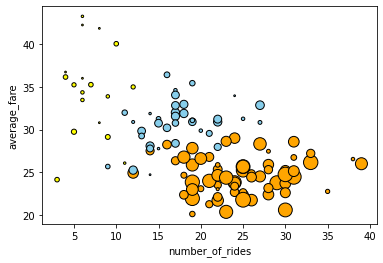

In [67]:
city_agg_df.plot(x='ride_count', y='avg_fare', kind = 'scatter', 
                 s= [x*3 for x in city_agg_df['driver_count']], 
                 color = city_agg_df['type_color'], edgecolor='black')

In [70]:
rural_agg_df = city_agg_df[city_agg_df['city_type'] == 'Rural']
suburban_agg_df = city_agg_df[city_agg_df['city_type'] == 'Suburban']
urban_agg_df = city_agg_df[city_agg_df['city_type'] == 'Urban']

In [71]:
rural_agg_df.head(2)

,number_of_rides,average_fare,driver_count,city_type,sum_of_fares,type_color
city,,,,,,
Bradshawfurt,10,40.064000,7,Rural,400.64,yellow
Garzaport,3,24.123333,7,Rural,72.37,yellow


In [ ]:
# Add the scatter charts for each type of city.
plt.scatter(urban_agg_df['ride_count'],
      urban_agg_df['avg_fare'],
      s=10*urban_agg_df['ride_count'], c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

# plt.scatter(suburban_ride_count,
#       suburban_avg_fare,
#       s=10*suburban_driver_count, c="skyblue",
#       edgecolor="black", linewidths=1,
#       alpha=0.8, label="Suburban")

# plt.scatter(rural_ride_count,
#       rural_avg_fare,
#       s=10*rural_driver_count, c="gold",
#       edgecolor="black", linewidths=1,
#       alpha=0.8, label="Rural")

# Show the plot
plt.show()

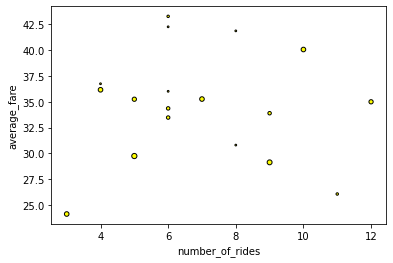

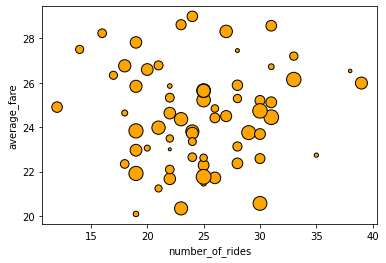

In [74]:
rural_agg_df.plot(x='number_of_rides', y='average_fare', kind = 'scatter', 
                 s= [x*3 for x in rural_agg_df['driver_count']], 
                 color = rural_agg_df['type_color'], edgecolor='black')
urban_agg_df.plot(x='number_of_rides', y='average_fare', kind = 'scatter', 
                 s= [x*3 for x in urban_agg_df['driver_count']], 
                 color = urban_agg_df['type_color'], edgecolor='black')
plt.show()